In [1]:
import numpy as np 
import pandas as pd 
print(pd.__version__)

2.0.2


# Time data basic concepts
Time is a unique concept that poses challenges in handling and calculations compared to numerical values. For example, time is not represented in a specific base like numbers are. For instance, minutes and seconds follow a base-60 system, while hours and days follow a base-24 system. Additionally, there are irregularities such as the varying number of days in a month (28 to 31 days) and the seven-day week. These complexities make time handling more complicated.

## Fixed times
Fixed times refers to specific points in time that are not part of recurring cycles or patterns. These are independent time points that do not occur regularly. Examples of fixed time points include specific dates like "January 1, 2020," events like "New Year's Eve," or moments like "12:00 PM on a particular day."

Fixed times have specific attributes associated with them, such as the year, month, day, hour, minute, second, and millisecond. These attributes provide information about when the fixed time occurs in relation to the overall timeline. By considering these attributes, we can determine the exact position of the fixed time within the broader context of time.

## Unix timestamp
A timestamp, specifically Unix timestamp, refers to the total number of seconds elapsed since January 1, 1970, at 00:00:00 UTC (Coordinated Universal Time). It is a large numeric value that continuously increases by one second increments. For example, the timestamp 1591684854 represents the time 2020/6/9 14:40:54 in Beijing time.

To represent time before the year 1970, negative numbers are used. For instance, the timestamp -1591684957 represents the time 1919/7/26 2:17:23. By using negative timestamps, time points before the Unix epoch (January 1, 1970) can be accurately represented.

## Time Deltas 
A time delta represents a duration or difference between two time points. It represents a specific length of time without specifying a specific start or end time. For example, if a song has a duration of 4 minutes, it will always be 4 minutes long regardless of when it is played.

Time deltas are useful for measuring durations, calculating time differences, or performing arithmetic operations on time-related data. They can be expressed in different units, such as seconds, minutes, hours, days, etc., and can be added, subtracted, or compared to other time deltas or time points.

## Formatting time
Formatting time in a specific format, such as converting a timestamp or a date string to a desired format like "2023年07月05日" in Chinese, can be achieved using the `strftime()` method in Python.

## Periodic time
Periodic time refers to time intervals that have a defined start and end, and follow a recurring pattern based on a specific time unit. It represents events or activities that occur repeatedly within a given timeframe.

For example, let's consider the workweek cycle. It starts when you graduate from college and begin working, and it ends when you retire at the age of 65. In this case, the time unit is a week, and the pattern is from Monday to Friday, working days.


## Date offsets
Date offsets are used to shift or move dates based on a specific frequency or unit of time. They allow us to perform operations such as adding or subtracting time intervals from dates based on predefined frequencies.

For example, if the frequency is set to hours, a date offset of three would mean shifting the date by three hours. Similarly, if the frequency is set to a workweek, a date offset of one workweek would be equivalent to shifting the date by one week based on the defined workweek schedule.

Date offsets provide flexibility in manipulating dates and aligning them with specific frequencies or custom-defined periods. They allow for easy calculation and adjustment of dates based on different time units, making it convenient to perform operations like shifting dates, aligning them with specific periods, or calculating time differences between dates.

## Time zones
Time zones are regions of the Earth that have the same standard time. Each fixed time is associated with a specific time zone, which is typically based on the local time of a particular geographic region. The time zone determines the offset from Coordinated Universal Time (UTC) and helps in representing the time in a specific region or location.

## Working days
In data analysis, it is common to consider whether a day is a working day or not. Apart from the regular weekends, each country and region has its own set of holidays, and even individual companies may have specific work schedules. Therefore, it is often necessary to specify the working day frequency for analysis.

## Time conversion 

Time conversion involves transforming the format of time expressions and performing various time calculations. Some common examples of time conversion include:
* Converting time format: This involves changing the representation of time from one format to another. For example, converting a timestamp to a specific date and time format, or converting a string-based date to a datetime object.

* Date calculations: This involves performing calculations on dates and times. For instance, determining the date of the same day last year, calculating the date that is 100 days prior to a given date, or adding/subtracting a specific duration from a given time.

* Timezone conversion: This involves converting a time value from one timezone to another. This is particularly useful when dealing with data from different time zones or when working with international time-related data.

# Time Series 
Time series data is a crucial data type in various fields of research, as it is inherently related to time. Therefore, effective handling of time data has become increasingly important. Pandas, a powerful data analysis tool, provides a variety of time data types and processing methods to facilitate the analysis of time series data.

## Four types of time series 
| Time Concept   | Type Representation | Array Class    | pandas Type                   | Creation Method      |
|----------------|---------------------|-----------------|-------------------------------|----------------------|
| Fixed Time     | Timestamp           | DatetimeIndex   | datetime64[ns] or datetime64[ns, tz]   | to_datetime or date_range  |
| Time Delta     | Timedelta           | TimedeltaIndex  | timedelta64[ns]              | to_timedelta or timedelta_range |
| Time Span      | Period              | PeriodIndex     | period[freq]                  | Period or period_range |
| Date Offset    | DateOffset          | None            | None                          | DateOffset            |

Time series data is often used as the index of a Series or DataFrame to facilitate operations on the time data.

## Creating fixed time data
Creating fixed time data with timestamps is the most basic type of time series data. It associates values with specific time points, allowing for various time-based operations. Defining and transforming timestamps correctly is crucial. Additionally, a specific `timestamp` contains rich information such as the year, day of the week, month, and quarter, which can be extracted as attributes.

`pd.Timestamp()` is a primary function in pandas for defining and working with timestamps. It serves as a replacement for the `datetime.datetime` object in Python and provides additional functionality specific to time series data.


### Python `datetime` library 

In [2]:
import datetime
pd.Timestamp(datetime.datetime(2023,7, 5)) # should include the year, month, and day information

Timestamp('2023-07-05 00:00:00')

In [3]:
pd.Timestamp(datetime.datetime(2023,7, 5, 14, 16, 32))

Timestamp('2023-07-05 14:16:32')

###  Specify a `timestamp` using a string

use the following format: "YYYY-MM-DD HH:MM:SS", where:
* YYYY represents the four-digit year.
* MM represents the two-digit month (01 to 12).
* DD represents the two-digit day of the month (01 to 31).
* HH represents the two-digit hour in 24-hour format (00 to 23).
* MM represents the two-digit minute (00 to 59).
* SS represents the two-digit second (00 to 59).

In [4]:
pd.Timestamp("2023-07-05")

Timestamp('2023-07-05 00:00:00')

In [5]:
pd.Timestamp('2023-07-05T12')  # the date and time separated by the letter "T".

Timestamp('2023-07-05 12:00:00')

### Specify the positions of time numbers
Specify the order: year, month, day，hour, minute, second, microsecond

In [6]:
pd.Timestamp(2023, 7, 5)

Timestamp('2023-07-05 00:00:00')

In [7]:
pd.Timestamp(2023, 7, 5, 14, 21)

Timestamp('2023-07-05 14:21:00')

In [8]:
pd.Timestamp(year = 2023, month = 7, day = 5, hour = 14)

Timestamp('2023-07-05 14:00:00')

### Parsing a Unix timestamp

In [9]:
import time
current_timestamp = int(time.time())
print(current_timestamp)

1689308897


In [10]:
pd.Timestamp(current_timestamp, unit = 's') # Unit: second

Timestamp('2023-07-14 04:28:17')

### To specify a specific time zone

Time zone strings:

* 'UTC' or 'GMT': Coordinated Universal Time
* 'US/Eastern', 'US/Central', 'US/Mountain', 'US/Pacific': US time zones
* 'Europe/London', 'Europe/Paris', 'Europe/Berlin': European time zones
* 'Asia/Tokyo', 'Asia/Shanghai', 'Asia/Dubai': Asian time zones
* 'Australia/Sydney', 'Australia/Adelaide', 'Australia/Perth': Australian time zones

In [11]:
pd.Timestamp(current_timestamp, unit = 's', tz = 'US/Eastern')

Timestamp('2023-07-14 00:28:17-0400', tz='US/Eastern')

In [12]:
pd.Timestamp(current_timestamp, unit = 's', tz = 'Asia/Shanghai')

Timestamp('2023-07-14 12:28:17+0800', tz='Asia/Shanghai')

### Special times

In [13]:
pd.Timestamp.today()

Timestamp('2023-07-14 00:28:17.962670')

In [14]:
# Get the current timestamp
current_time = pd.Timestamp.now()
current_time

Timestamp('2023-07-14 00:28:17.977628')

In [15]:
pd.Timestamp.today().date() # only show dates

datetime.date(2023, 7, 14)

In [16]:
# Yesterday
pd.Timestamp.now() - pd.Timedelta(days = 1)

Timestamp('2023-07-13 00:28:18.009571')

In [17]:
# Tomorrow 
pd.Timestamp.now() + pd.Timedelta(days = 1)

Timestamp('2023-07-15 00:28:18.024504')

In [18]:
# The first day of the current month
pd.Timestamp.now().replace(day = 1)

Timestamp('2023-07-01 00:28:18.039463')

## Time attributes operation

### Time attributes

In [19]:
time = pd.Timestamp.now()
time

Timestamp('2023-07-14 00:28:18.055421')

In [20]:
time.asm8 # return numpy datetime64 

numpy.datetime64('2023-07-14T00:28:18.055421')

In [21]:
time.dayofweek

4

In [22]:
time.value

1689294498055421000

###### Other attributes: 
* `time.dayofweek`: Returns the day of the week as an integer (Monday is 0 and Sunday is 6).

* `time.dayofyear`: Returns the day of the year (1 to 366).
* `time.days_in_month`: Returns the number of days in the month.

*  `time.freqstr: Returns` the frequency string representing the time period.
*  `time.is_leap_year`: Returns True if the year is a leap year in the Gregorian calendar.
*  `time.is_month_end`: Returns True if the date is the last day of the month.
*  `time.is_month_start`: Returns True if the date is the first day of the month.
*  `time.is_quarter_end`: Returns True if the date is the last day of the quarter.
*  `time.is_quarter_start`: Returns True if the date is the first day of the quarter.
*  `time.is_year_end`: Returns True if the date is the last day of the year.
*  `time.is_year_start`: Returns True if the date is the first day of the year.
*  `time.quarter`: Returns the quarter of the year (1 to 4).
*  `time.tz`: Returns the timezone alias of the timestamp.
*  `time.week`: Returns the week number of the year.
*  `time.day`: Returns the day of the month.
*  `time.fold`: Returns the fold number, used to disambiguate between overlapping times during daylight saving time transitions.
*  `time.freq`: Returns the frequency of the timestamp.
*  `time.hour`: Returns the hour.
*  `time.microsecond`: Returns the microsecond.
*  `time.minute`: Returns the minute.
*  `time.month`: Returns the month.
*  `time.nanosecond`: Returns the nanosecond.
*  `time.second`: Returns the second.
*  `time.tzinfo`: Returns the timezone information (None for timezone-naive timestamps).
* `time.value`: Returns the timestamp value as a numpy int64.
*  `time.year`: Returns the year.

### Time methods


In [23]:
time = pd.Timestamp.now(tz = 'Asia/Shanghai')
time 

Timestamp('2023-07-14 12:28:18.118252+0800', tz='Asia/Shanghai')

In [24]:
# To convert a Timestamp object to a specific time zone
time.astimezone('UTC')

Timestamp('2023-07-14 04:28:18.118252+0000', tz='UTC')

In [25]:
# Convert the unit to second and round it up
time.ceil('s')

Timestamp('2023-07-14 12:28:19+0800', tz='Asia/Shanghai')

In [26]:
# Convert the unit to day and round it up
time.ceil('d')

Timestamp('2023-07-15 00:00:00+0800', tz='Asia/Shanghai')

In [27]:
time.floor('h') # keep hour

Timestamp('2023-07-14 12:00:00+0800', tz='Asia/Shanghai')

In [28]:
time.round('h') # keep hour

Timestamp('2023-07-14 12:00:00+0800', tz='Asia/Shanghai')

In [29]:
time.day_name()  # return the name of the weekday

'Friday'

In [30]:
time.month_name() # return the name of the month 

'July'

In [31]:
# To normalize a timestamp to midnight while preserving the timezone information
time.normalize()

Timestamp('2023-07-14 00:00:00+0800', tz='Asia/Shanghai')

## Time Type Conversion
Due to the variety of time formats, in many cases, Pandas cannot automatically recognize them as time types. Therefore, during the data cleaning process before processing, we need to specifically convert the data to the time type.

### `astype`

`astype` is the simplest method for time conversion. It can only be used for relatively standard time formats.

In [32]:
s = pd.Series(['2023-01-31', '2023-02-28', '2023-03-31'])
s.astype('datetime64[ns]')

0   2023-01-31
1   2023-02-28
2   2023-03-31
dtype: datetime64[ns]

In [33]:
# Specify the time zone 
s.astype('datetime64[ns, US/Eastern]')

0   2023-01-31 00:00:00-05:00
1   2023-02-28 00:00:00-05:00
2   2023-03-31 00:00:00-04:00
dtype: datetime64[ns, US/Eastern]

### `pd.to_datetime`
The main tool provided by Pandas for recognizing and converting time is `pd.to_datetime()`.

Combining date and time from multiple columns in a DataFrame. The keys can be common abbreviations, such as `['year', 'month', 'day', 'minute', 'second', 'ms', 'us', 'ns']`:

Required: year, month, day
Optional: hour, minute, second, millisecond, microsecond, nanosecond

In [34]:
df = pd.DataFrame({'year': [2020, 2021],
                   'month': [2, 3],
                   'day': [4, 5]})
df

,year,month,day
0,2020,2,4
1,2021,3,5


In [35]:
pd.to_datetime(df)

0   2020-02-04
1   2021-03-05
dtype: datetime64[ns]

In [36]:
pd.to_datetime(df[['year', 'month', 'day']])

0   2020-02-04
1   2021-03-05
dtype: datetime64[ns]

###### Smart parsing of dates and times.

- passing `format` if your strings have a consistent format;
- passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
- passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [37]:
pd.to_datetime(pd.Series(['Dec 31, 2023', '2023-01-10', None]), format = 'mixed') # add format argument

0   2023-12-31
1   2023-01-10
2          NaT
dtype: datetime64[ns]

In [38]:
pd.to_datetime(['2005/11/23', '2010.12.31'], format = 'mixed')

DatetimeIndex(['2005-11-23', '2010-12-31'], dtype='datetime64[ns]', freq=None)

In [39]:
pd.to_datetime(['04-01-2012 10:00'], dayfirst = True) 

DatetimeIndex(['2012-01-04 10:00:00'], dtype='datetime64[ns]', freq=None)

###### Use `pd.Timestamp()` for conversion 

In [40]:
pd.to_datetime('2023/11/12')

Timestamp('2023-11-12 00:00:00')

In [41]:
pd.Timestamp('2023/11/12')

Timestamp('2023-11-12 00:00:00')

##### Aslo can work with `pd.DatetimeIndex` to convert

In [42]:
pd.DatetimeIndex(['2023-01-01', '2023-01-03', '2023-01-05'])

DatetimeIndex(['2023-01-01', '2023-01-03', '2023-01-05'], dtype='datetime64[ns]', freq=None)

###### By using `infer`,  Pandas automatically determines the frequency based on the input dates rather than specifying it explicitly.

In [43]:
pd.DatetimeIndex(['2023-01-01', '2023-01-03', '2023-01-05'], freq = 'infer')

DatetimeIndex(['2023-01-01', '2023-01-03', '2023-01-05'], dtype='datetime64[ns]', freq='2D')

##### For formatted data, we need to specify the format of the data using the format parameter


The `errors='ignore'` parameter indicates that if there are any errors during the conversion, such as an invalid date format, the function should ignore them and return the original input without raising an error.

In this case, since the input date '13000101' is not a valid date, the function will ignore the error and return the original string '13000101' as the output without raising an error.

In [44]:
pd.to_datetime('13000101', format = '%Y%m%d', errors = 'ignore')

'13000101'

When `errors='coerce'` is specified, any parsing errors encountered during the conversion process will result in a missing value (`NaN`) instead of raising an error. This means that if the input string cannot be successfully parsed according to the specified format, the resulting `datetime` value will be `NaT` (Not a Time).

In [45]:
pd.to_datetime('13000101', format = '%Y%m%d', errors = 'coerce')

NaT

In [46]:
df

,year,month,day
0,2020,2,4
1,2021,3,5


In [47]:
pd.to_datetime(df, format = '%m/%d/%Y')

0   2020-02-04
1   2021-03-05
dtype: datetime64[ns]

In [48]:
pd.to_datetime('2023/11/12', format = '%Y/%m/%d')

Timestamp('2023-11-12 00:00:00')

In [49]:
pd.to_datetime('12-11-2010 00:00', format = '%d-%m-%Y %H:%M')

Timestamp('2010-11-12 00:00:00')

In [50]:
# convert the timestamp to a datetime object. 
#The unit='s' parameter specifies that the timestamp is in seconds.
current_timestamp

1689308897

In [51]:
pd.to_datetime(current_time, unit = 's')

Timestamp('2023-07-14 00:28:17.977628')

### Time formating symbols

* %y: Year without century as a zero-padded decimal number (00-99)
* %Y: Year with century as a decimal number (000-9999)
* %m: Month as a zero-padded decimal number (01-12)
* %d: Day of the month as a zero-padded decimal number (01-31)
* %H: Hour (24-hour clock) as a zero-padded decimal number (00-23)
* %I: Hour (12-hour clock) as a zero-padded decimal number (01-12)
* %M: Minute as a zero-padded decimal number (00-59)
* %S: Second as a zero-padded decimal number (00-59)
* %a: Locale's abbreviated weekday name (e.g., Mon)
* %A: Locale's full weekday name (e.g., Monday)
* %b: Locale's abbreviated month name (e.g., Jan)
* %B: Locale's full month name (e.g., January)
* %c: Locale's appropriate date and time representation
* %j: Day of the year as a zero-padded decimal number (001-366)
* %p: Locale's equivalent of either AM or PM
* %U: Week number of the year (Sunday as the first day of the week) as a zero-padded decimal number (00-53)
* %w: Weekday as a decimal number (0-6, where Sunday is 0)
* %W: Week number of the year (Monday as the first day of the week) as a zero-padded decimal number (00-53)
* %x: Locale's appropriate date representation
* %X: Locale's appropriate time representation
* %Z: Time zone name (e.g., GMT)
* %%: Percentage sign itself

## Time period
The characteristic of a time period/range is that it has a start time and an end time, as well as a frequency or duration. Time periods are widely used in fields such as economics, physics, finance, and more.

### Generate a range of time period
We can use `pd.DatetimeIndex()` and `pd.Index()` to construct a range of time data. 

In [52]:
dates = [datetime.datetime(2023, 5, 1),
         datetime.datetime(2023, 5, 2),
         datetime.datetime(2023, 5, 3)]

# No frequency
pd.DatetimeIndex(dates)

DatetimeIndex(['2023-05-01', '2023-05-02', '2023-05-03'], dtype='datetime64[ns]', freq=None)

In [53]:
pd.Index(dates) # same results as pd.DatetimeIndex

DatetimeIndex(['2023-05-01', '2023-05-02', '2023-05-03'], dtype='datetime64[ns]', freq=None)

In [54]:
pd.date_range(start = '1/1/2023', end = '1/08/2023')  # month, day, year

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08'],
              dtype='datetime64[ns]', freq='D')

In [55]:
pd.date_range(start = '1/1/2023', periods = 8)

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08'],
              dtype='datetime64[ns]', freq='D')

In [56]:
pd.date_range(end = '1/1/2023', periods = 8)

DatetimeIndex(['2022-12-25', '2022-12-26', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30', '2022-12-31', '2023-01-01'],
              dtype='datetime64[ns]', freq='D')

In [57]:
# Use strftime to convert the timestamp to formating string
pd.date_range(start = pd.Timestamp.now().strftime('%Y-%m-%d'), periods = 7)

DatetimeIndex(['2023-07-14', '2023-07-15', '2023-07-16', '2023-07-17',
               '2023-07-18', '2023-07-19', '2023-07-20'],
              dtype='datetime64[ns]', freq='D')

In [58]:
# Specify the frequency to be month
pd.date_range(start = pd.Timestamp.now().strftime('%Y-%m-%d'), periods = 7, freq = 'M')

DatetimeIndex(['2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31',
               '2023-11-30', '2023-12-31', '2024-01-31'],
              dtype='datetime64[ns]', freq='M')

### Workday frequency `bdate_range`
The `pd.bdate_range` function can be used to generate a date range with a business day frequency, where weekends (Saturday and Sunday) are skipped. 

In [59]:
pd.bdate_range(start = '7/10/2023', end = '7/21/2023')

DatetimeIndex(['2023-07-10', '2023-07-11', '2023-07-12', '2023-07-13',
               '2023-07-14', '2023-07-17', '2023-07-18', '2023-07-19',
               '2023-07-20', '2023-07-21'],
              dtype='datetime64[ns]', freq='B')

## Offset

Periodic data has a base frequency, also known as resolution or granularity. Time offsets are composed of a base frequency and a multiplier, which are useful for working with periodic data. Pandas provides a specialized object called `Date offsets` to handle time offsets. The DateOffset class performs similar operations to `dateutil.relativedelta`, allowing for date offsets based on the real calendar rules, and supports arithmetic operations using the addition operator (+) or the apply method.

###  DateOffset Objects
`DateOffset` is similar to `timedelta`, but it follows the rules of the calendar for date and time calculations, making it more aligned with real-life scenarios. For example, in regions that observe daylight saving time, the daily time offset can be 23, 24, or even 25 hours.

Difference between `DateOffset` and `Timedelta`

* `Timedelta` represents absolute time differences, where adding or subtracting 1 day always corresponds to 24 hours, regardless of daylight saving time.
* `DateOffset` represents relative time differences and adjusts the time accordingly, considering the actual length of the day (23, 24, or 25 hours) based on the specific date.

### `DateOffset` example

Below is an example of daylight saving time,  if we add a `pd.Timedelta(days=1)` to a specific date, it will always increment the date by exactly one day, regardless of any calendar rules such as daylight saving time or leap years.

On the other hand, if you add a `pd.DateOffset(days=1)` to a specific date, it will consider calendar rules and adjust the date accordingly.

In [60]:
# To generate a specific time in Finnish Helsinki time,
ts = pd.Timestamp('2023-7-10 00:00:00', tz = 'Europe/Helsinki')
ts

Timestamp('2023-07-10 00:00:00+0300', tz='Europe/Helsinki')

In [61]:
# Add one day
ts + pd.Timedelta(days = 1)

Timestamp('2023-07-11 00:00:00+0300', tz='Europe/Helsinki')

In [62]:
# To increment a date by one day using calendar time
ts + pd.DateOffset(days = 1)

Timestamp('2023-07-11 00:00:00+0300', tz='Europe/Helsinki')

### To add or subtract a specifit duration of time
We can use `pd.DateOffset`, you can specify the desired offset as an argument when creating a `pd.DateOffset` object. The available options for the offset parameter include years, months, weeks, days, hours, minutes, and seconds.

In [63]:
ts = pd.Timestamp.now()
ts + pd.DateOffset(months = 3)

Timestamp('2023-10-14 00:28:18.749565')

In [64]:
ts + pd.DateOffset(hours = 2)

Timestamp('2023-07-14 02:28:18.749565')

### Commonly used offset object
| Frequency | Offset                                          |
|-----------|-------------------------------------------------|
| D/B       | DateOffset or BDay                              |
| W         | Week                                            |
| (B)M      | (B)MonthEnd or (B)MonthBegin                    |
| (B)Q      | (B)QuarterEnd or (B)QuarterBegin                |
| (B)Y      | (B)YearEnd or (B)YearBegin                      |
| (B)MS     | (B)MonthEnd or (B)MonthBegin                    |
| (B)QS     | (B)QuarterEnd or (B)QuarterBegin                |
| (B)YS     | (B)YearEnd or (B)YearBegin                      |
| H         | Hour                                            |
| T         | Minute                                          |
| S         | Second                                          |
| C         | Custom Business Day Offset (pandas CustomBusinessDay) |


In [65]:
pd.Timestamp.now() + pd.offsets.Week(2)

Timestamp('2023-07-28 00:28:18.781479')

In [66]:
# adds one business quarter to the current timestamp.
pd.Timestamp.now() + pd.offsets.BQuarterBegin(1)

Timestamp('2023-09-01 00:28:18.805416')

# Time Series Indexing

##  Time Index Slicing
When working with time series data, we often need to select a subset of the data based on a specific time range. Pandas provides several methods for time index slicing.

In [67]:
# Business month end 
rng = pd.date_range('1/1/2023', '12/1/2023', freq = 'BM')
ts = pd.Series(np.random.randn(len(rng)), index = rng)
ts

2023-01-31   -0.289541
2023-02-28    0.118338
2023-03-31    0.878664
2023-04-28    0.093831
2023-05-31   -0.755808
2023-06-30    0.487227
2023-07-31    2.112644
2023-08-31    0.541513
2023-09-29   -1.192744
2023-10-31    1.837886
2023-11-30    1.474369
Freq: BM, dtype: float64

In [68]:
ts[2:4].index

DatetimeIndex(['2023-03-31', '2023-04-28'], dtype='datetime64[ns]', freq='BM')

In [69]:
ts[::2].index

DatetimeIndex(['2023-01-31', '2023-03-31', '2023-05-31', '2023-07-31',
               '2023-09-29', '2023-11-30'],
              dtype='datetime64[ns]', freq='2BM')

## Indexing by label:

In [70]:
ts['2023-09-29']

-1.1927443004067002

In [71]:
ts[datetime.datetime(2023, 9, 29):] # from 2023-09-29 to the end 

2023-09-29   -1.192744
2023-10-31    1.837886
2023-11-30    1.474369
Freq: BM, dtype: float64

In [72]:
ts['5/31/2023':'8/31/2023']

2023-05-31   -0.755808
2023-06-30    0.487227
2023-07-31    2.112644
2023-08-31    0.541513
Freq: BM, dtype: float64

In [73]:
ts['2023']

2023-01-31   -0.289541
2023-02-28    0.118338
2023-03-31    0.878664
2023-04-28    0.093831
2023-05-31   -0.755808
2023-06-30    0.487227
2023-07-31    2.112644
2023-08-31    0.541513
2023-09-29   -1.192744
2023-10-31    1.837886
2023-11-30    1.474369
Freq: BM, dtype: float64

## The resolution or granularity of a frequency
It refers to the smallest unit of time that the frequency represents. In the previous examples, we saw frequencies like business days and calendar days, both of which are based on days as the common resolution.

The resolution attribute of a `DatetimeIndex` or `TimedeltaIndex`in pandas can be useful in various applications:

* **Data Analysis and Visualization**: Knowing the resolution of a time index can help in understanding the level of detail or granularity in the time data. It allows for proper analysis and visualization of the data at the appropriate time intervals. For example, if the resolution is at the minute level, you can perform minute-level analysis or plot data at minute intervals.

* **Time Aggregation**: The resolution can be used to aggregate or group time series data at different levels. For example, if the resolution is at the daily level, you can aggregate data by month, quarter, or year by utilizing the resolution information.

* **Time-based Filtering**: The resolution can be used to filter the time series data based on specific time intervals. For example, if the resolution is at the hour level, you can filter data for a specific hour of the day or a range of hours.

* **Time Series Operations**: The resolution can be considered while performing time series operations such as resampling, interpolation, or alignment. It helps in ensuring that the operations are performed at the desired level of precision.

Overall, understanding the resolution of a time index allows for better manipulation, analysis, and interpretation of time series data in pandas. It provides the necessary context for working with time-based data and enables appropriate handling of the data at different levels of detail or precision.

In [74]:
series_minute = pd.Series([1, 2, 3],
                          pd.DatetimeIndex(['2022-12-31 23:59:00',
                                            '2023-01-01 00:00:00',
                                            '2023-01-01 00:02:00']))
series_minute.index.resolution

'minute'

In [75]:
# return a subset of the series that includes all entries that fall within the specified hour.
series_minute['2022-12-31 23'] # retrive by hour

2022-12-31 23:59:00    1
dtype: int64

In [76]:
series_minute['2023-01-01 00']

2023-01-01 00:00:00    2
2023-01-01 00:02:00    3
dtype: int64

In [77]:
series_second = pd.Series([1, 2, 3],
                          pd.DatetimeIndex(['2022-12-31 23:59:59',
                                            '2023-01-01 00:00:00',
                                            '2023-01-01 00:00:01']))
series_second

2022-12-31 23:59:59    1
2023-01-01 00:00:00    2
2023-01-01 00:00:01    3
dtype: int64

In [78]:
series_second.index.resolution

'second'

## Truncation indexing 
`df.truncate()` is a useful tool for truncating (or slicing) a DataFrame based on the index values. It allows you to select a subset of the data within a specific range of the index. When applied to a time series index, such as a `DatetimeIndex`, `df.truncate()` can be especially helpful in working with time-based data.

The `df.truncate()` function takes two main arguments: `before` and `after`, which specify the start and end points of the range to include in the truncated DataFrame. It returns a new DataFrame containing only the rows within the specified index range.

In [79]:
rng2 = pd.date_range('2023-06-01', '2024-01-01', freq ='W')
ts2 = pd.Series(np.random.randn(len(rng2)), index = rng2)
ts2

2023-06-04   -1.146954
2023-06-11    0.787013
2023-06-18    2.363992
2023-06-25    2.089374
2023-07-02   -0.009351
2023-07-09    1.178917
2023-07-16   -1.581136
2023-07-23    0.495810
2023-07-30    0.844120
2023-08-06   -0.684021
2023-08-13   -2.590597
2023-08-20   -2.876724
2023-08-27   -0.709572
2023-09-03    0.394527
2023-09-10   -0.213990
2023-09-17    0.176764
2023-09-24    0.111473
2023-10-01    1.086191
2023-10-08   -0.592974
2023-10-15   -0.838464
2023-10-22    0.617564
2023-10-29   -0.378154
2023-11-05    1.390811
2023-11-12   -0.731473
2023-11-19    0.131521
2023-11-26    1.025194
2023-12-03   -1.826369
2023-12-10    0.760593
2023-12-17   -1.023336
2023-12-24    0.667236
2023-12-31   -0.233309
Freq: W-SUN, dtype: float64

In [80]:
ts2.truncate(before = '2023-11', after = '2023-12')

2023-11-05    1.390811
2023-11-12   -0.731473
2023-11-19    0.131521
2023-11-26    1.025194
Freq: W-SUN, dtype: float64

In [81]:
ts2['2023-11':'2023-12'] # difference from ts2.truncate

2023-11-05    1.390811
2023-11-12   -0.731473
2023-11-19    0.131521
2023-11-26    1.025194
2023-12-03   -1.826369
2023-12-10    0.760593
2023-12-17   -1.023336
2023-12-24    0.667236
2023-12-31   -0.233309
Freq: W-SUN, dtype: float64

In [82]:
ts2[[0, 2, 6]].index  

DatetimeIndex(['2023-06-04', '2023-06-18', '2023-07-16'], dtype='datetime64[ns]', freq=None)

In [83]:
df = pd.DataFrame({'A': ['a', 'b', 'c', 'd', 'e'],
                   'B': ['f', 'g', 'h', 'i', 'j'],
                   'C': ['k', 'l', 'm', 'n', 'o']},
                  index = [1, 2, 3, 4, 5])
df

,A,B,C
1,a,f,k
2,b,g,l
3,c,h,m
4,d,i,n
5,e,j,o


In [84]:
df.truncate(before = 2, after = 4)

,A,B,C
2,b,g,l
3,c,h,m
4,d,i,n


In [85]:
# By column
df.truncate(before = "A", after = "B", axis = "columns")

,A,B
1,a,f
2,b,g
3,c,h
4,d,i
5,e,j


In [86]:
df['A'].truncate(before = 2, after = 4)

2    b
3    c
4    d
Name: A, dtype: object

In [87]:
dates = pd.date_range('2023-01-01', '2023-02-01', freq = 's')
df = pd.DataFrame(index = dates, data = {'A': 1})
df.tail()

,A
2023-01-31 23:59:56,1
2023-01-31 23:59:57,1
2023-01-31 23:59:58,1
2023-01-31 23:59:59,1
2023-02-01 00:00:00,1


In [88]:
df.truncate(before = pd.Timestamp('2023-01-05'),
            after = pd.Timestamp('2023-01-10')).tail()

,A
2023-01-09 23:59:56,1
2023-01-09 23:59:57,1
2023-01-09 23:59:58,1
2023-01-09 23:59:59,1
2023-01-10 00:00:00,1


In [89]:
df.truncate('2023-01-05', '2023-01-10').tail()

,A
2023-01-09 23:59:56,1
2023-01-09 23:59:57,1
2023-01-09 23:59:58,1
2023-01-09 23:59:59,1
2023-01-10 00:00:00,1


# Time series operation methods 

Just like other types of data, time series data often requires various operations such as aggregation, shifting, calculations, and more. In this section, we will explore some of the methods provided by Pandas for handling time series data.

## Shifting 
`shift()`: Shift the time index by a specified number of periods.

`tshift()`: Shift the time index by a specified time offset.

In [90]:
rng = pd.date_range('2023-07-01', '2023-07-03')
ts = pd.Series(range(len(rng)), index = rng)
ts

2023-07-01    0
2023-07-02    1
2023-07-03    2
Freq: D, dtype: int64

In [91]:
ts.shift(2)  # shift the values two days forward

2023-07-01    NaN
2023-07-02    NaN
2023-07-03    0.0
Freq: D, dtype: float64

In [92]:
# work days by freq parameter
ts.shift(3, freq = pd.offsets.BDay())

2023-07-05    0
2023-07-05    1
2023-07-06    2
dtype: int64

## Frequency conversion
`asfreq()`: Convert the time series data to a specified frequency by filling or dropping values, can also handle time rescaling operations, such as converting daily data to monthly data.

In [93]:
dr = pd.date_range('1/1/2023', periods = 3, freq = 3 * pd.offsets.BDay())
ts = pd.Series(np.random.randn(3), index=dr)
ts

2023-01-02   -0.407041
2023-01-05    0.456742
2023-01-10    0.517278
Freq: 3B, dtype: float64

In [94]:
# convert three workdays to 1 workdays
ts.asfreq(pd.offsets.BDay())

2023-01-02   -0.407041
2023-01-03         NaN
2023-01-04         NaN
2023-01-05    0.456742
2023-01-06         NaN
2023-01-09         NaN
2023-01-10    0.517278
Freq: B, dtype: float64

The `asfreq()` method in Pandas is used to convert a time series to a specified frequency and provides additional convenience by allowing you to specify an interpolation method for any gaps that may occur after frequency conversion.

In [95]:
# argument specifies that any missing values should be filled with the 
# most recent observed value (forward filling). 
ts.asfreq(pd.offsets.BDay(), method = 'pad')

2023-01-02   -0.407041
2023-01-03   -0.407041
2023-01-04   -0.407041
2023-01-05    0.456742
2023-01-06    0.456742
2023-01-09    0.456742
2023-01-10    0.517278
Freq: B, dtype: float64

In [96]:
ts.asfreq(freq = '30S', fill_value = 9.0)

2023-01-02 00:00:00   -0.407041
2023-01-02 00:00:30    9.000000
2023-01-02 00:01:00    9.000000
2023-01-02 00:01:30    9.000000
2023-01-02 00:02:00    9.000000
                         ...   
2023-01-09 23:58:00    9.000000
2023-01-09 23:58:30    9.000000
2023-01-09 23:59:00    9.000000
2023-01-09 23:59:30    9.000000
2023-01-10 00:00:00    0.517278
Freq: 30S, Length: 23041, dtype: float64

###### For a `DatetimeIndex`, `asfreq()` is essentially a convenient wrapper around `reindex()` that generates a `date_range` and calls `reindex` internally.

In [97]:
date_index = pd.date_range('1/1/2023', periods = 6, freq = 'D')
df2 = pd.DataFrame({"prices": [100, 101, np.nan, 100, 89, 88]},
                   index = date_index)
df2

,prices
2023-01-01,100.0
2023-01-02,101.0
2023-01-03,NaN
2023-01-04,100.0
2023-01-05,89.0
2023-01-06,88.0


In [98]:
# Extend the date to large time range
date_index2 = pd.date_range('12/29/2022', periods = 10, freq = 'D')
df2.reindex(date_index2)

,prices
2022-12-29,NaN
2022-12-30,NaN
2022-12-31,NaN
2023-01-01,100.0
2023-01-02,101.0
2023-01-03,NaN
2023-01-04,100.0
2023-01-05,89.0
2023-01-06,88.0
2023-01-07,NaN


In [99]:
df2.reindex(date_index2, method = 'bfill')

,prices
2022-12-29,100.0
2022-12-30,100.0
2022-12-31,100.0
2023-01-01,100.0
2023-01-02,101.0
2023-01-03,NaN
2023-01-04,100.0
2023-01-05,89.0
2023-01-06,88.0
2023-01-07,NaN


# Time resampling 

Resampling refers to the process of converting time series data from one frequency to another. It is a common operation in financial applications but can be applied to various domains. Pandas provides powerful resampling functionality that is simple to use and efficient.

## `resample()`
The main function for resampling in Pandas is `resample()`. It allows you to specify the desired frequency for the resulting time series and apply an aggregation or transformation operation to the data within each interval. Some common frequency conversion options include `upsampling` (increasing the frequency), `downsampling` (decreasing the frequency), and maintaining the same frequency but applying a different aggregation method.

In [100]:
index = pd.date_range('1/1/2023', periods = 1000, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(index)), index = index)
ts

2023-01-01 00:00:00     37
2023-01-01 00:00:01     19
2023-01-01 00:00:02    190
2023-01-01 00:00:03    199
2023-01-01 00:00:04     17
                      ... 
2023-01-01 00:16:35    493
2023-01-01 00:16:36     35
2023-01-01 00:16:37    246
2023-01-01 00:16:38    250
2023-01-01 00:16:39    118
Freq: S, Length: 1000, dtype: int32

In [101]:
 # Resample the time series to 5-minute frequency
ts.resample('5Min').sum()

2023-01-01 00:00:00    77042
2023-01-01 00:05:00    74786
2023-01-01 00:10:00    77464
2023-01-01 00:15:00    26926
Freq: 5T, dtype: int32

##### the `resample()` function in Pandas allows us to specify various parameters to control the frequency conversion and resampling operations. We can also apply any available function (similar to groupby) as a method on the resulting object, including `sum`, `mean`, `std`, `sem`, `max`, `min`, `mid`, `median`, `first`, `last`, `ohlc` (open, high, low, close).

In [102]:
ts.resample('5T').mean() # Mean

2023-01-01 00:00:00    256.806667
2023-01-01 00:05:00    249.286667
2023-01-01 00:10:00    258.213333
2023-01-01 00:15:00    269.260000
Freq: 5T, dtype: float64

In [103]:
ts.resample('5T').max()

2023-01-01 00:00:00    494
2023-01-01 00:05:00    498
2023-01-01 00:10:00    499
2023-01-01 00:15:00    494
Freq: 5T, dtype: int32

## Open-High-Low-Close chart, OHLC chart
An Open-High-Low-Close chart (OHLC chart), also known as a bar chart, is a graphical representation of stock price movements. It displays the opening price, high price, low price, and closing price of a security or financial instrument within a specific time period.

The OHLC chart consists of vertical lines that represent the price range between the high and low prices for a given period. The left horizontal line represents the opening price, and the right horizontal line represents the closing price. The length of the vertical line indicates the price range, with the top point indicating the high price and the bottom point indicating the low price.

The OHLC chart provides valuable information about the price volatility and trading range of a security. It helps traders and investors analyze the market trends, identify key support and resistance levels, and make informed decisions about buying or selling securities.

In addition to the OHLC chart, there is also a variation called the High-Low-Close chart (HLC chart) that only displays the high price, low price, and closing price. This variation provides a simplified view of price movements without the opening price.

Both OHLC and HLC charts are widely used in technical analysis and financial trading to study price patterns, identify trends, and generate trading signals. They are commonly used in stock market analysis, futures trading, and other financial markets.

In [104]:
ts.resample('5Min').ohlc()

,open,high,low,close
2023-01-01 00:00:00,37,494,0,252
2023-01-01 00:05:00,431,498,0,284
2023-01-01 00:10:00,159,499,2,388
2023-01-01 00:15:00,282,494,1,118


## Close and open Interval specification
When closed is set to `left` (default), it means that the left bin edge is inclusive and the right bin edge is exclusive. This means that the values falling on the left bin edge are included in the resampled interval, while the values falling on the right bin edge are excluded.

On the other hand, when closed is set to `right`, it means that the right bin edge is inclusive and the left bin edge is exclusive. In this case, the values falling on the right bin edge are included in the resampled interval, while the values falling on the left bin edge are excluded.

The choice of closed interval specification depends on the specific use case and the desired behavior for handling the boundaries of the resampled intervals.

In [105]:
ts.resample('5Min', closed = 'right').mean()

2022-12-31 23:55:00     37.000000
2023-01-01 00:00:00    258.120000
2023-01-01 00:05:00    248.380000
2023-01-01 00:10:00    258.623333
2023-01-01 00:15:00    269.131313
Freq: 5T, dtype: float64

## Upsampling

Upsampling refers to the process of increasing the frequency or granularity of the data. It involves adding more data points within the existing time intervals to create a higher-resolution representation of the time series.

When upsampling, interpolation methods are commonly used to estimate the values of the new data points. Interpolation algorithms fill in the gaps between existing data points by calculating intermediate values based on the available information. 

There are various interpolation methods that can be used for upsampling time series data, such as linear interpolation, polynomial interpolation, spline interpolation, and more. The choice of interpolation method depends on the specific characteristics of the data and the desired accuracy of the upsampled series.

Upsampling can be useful in situations where a higher frequency or more detailed analysis is required, or when aligning data from different sources with different frequencies.

In [106]:
ts.resample('250L').asfreq()

2023-01-01 00:00:00.000     37.0
2023-01-01 00:00:00.250      NaN
2023-01-01 00:00:00.500      NaN
2023-01-01 00:00:00.750      NaN
2023-01-01 00:00:01.000     19.0
                           ...  
2023-01-01 00:16:38.000    250.0
2023-01-01 00:16:38.250      NaN
2023-01-01 00:16:38.500      NaN
2023-01-01 00:16:38.750      NaN
2023-01-01 00:16:39.000    118.0
Freq: 250L, Length: 3997, dtype: float64

In [107]:
ts.resample('250L').ffill()

2023-01-01 00:00:00.000     37
2023-01-01 00:00:00.250     37
2023-01-01 00:00:00.500     37
2023-01-01 00:00:00.750     37
2023-01-01 00:00:01.000     19
                          ... 
2023-01-01 00:16:38.000    250
2023-01-01 00:16:38.250    250
2023-01-01 00:16:38.500    250
2023-01-01 00:16:38.750    250
2023-01-01 00:16:39.000    118
Freq: 250L, Length: 3997, dtype: int32

In [108]:
ts.resample('250L').ffill(limit = 2)

2023-01-01 00:00:00.000     37.0
2023-01-01 00:00:00.250     37.0
2023-01-01 00:00:00.500     37.0
2023-01-01 00:00:00.750      NaN
2023-01-01 00:00:01.000     19.0
                           ...  
2023-01-01 00:16:38.000    250.0
2023-01-01 00:16:38.250    250.0
2023-01-01 00:16:38.500    250.0
2023-01-01 00:16:38.750      NaN
2023-01-01 00:16:39.000    118.0
Freq: 250L, Length: 3997, dtype: float64

## Aggregation 


Similar to the aggregating API, groupby API, and window methods API, the Resampler also supports related methods. When resampling a DataFrame, the default behavior is to operate on all columns with the same function.

In [109]:
df = pd.DataFrame(np.random.randn(1000, 3),
                  index = pd.date_range('1/1/2023', freq='S', periods = 1000),
                  columns = ['A', 'B', 'C'])
df


,A,B,C
2023-01-01 00:00:00,-2.214071,1.415934,-0.389713
2023-01-01 00:00:01,-0.286658,0.312630,1.770748
2023-01-01 00:00:02,1.105574,-1.583992,-0.256122
2023-01-01 00:00:03,0.636609,-0.880157,-0.718622
2023-01-01 00:00:04,-0.772166,-0.206349,0.491622
...,...,...,...
2023-01-01 00:16:35,-1.079877,-0.632550,0.849259
2023-01-01 00:16:36,0.156982,1.473091,0.340314
2023-01-01 00:16:37,-0.221105,2.280897,0.264965
2023-01-01 00:16:38,-0.684674,-0.185430,0.516887


In [110]:
df.resample('3T').mean()  # a frequency of 3 minitues

,A,B,C
2023-01-01 00:00:00,-0.130677,0.016028,0.072004
2023-01-01 00:03:00,0.050898,-0.083788,0.011909
2023-01-01 00:06:00,-0.107633,-0.064984,-0.006415
2023-01-01 00:09:00,-0.079010,0.045580,0.104976
2023-01-01 00:12:00,-0.033693,-0.046964,0.136211
2023-01-01 00:15:00,0.097840,0.019709,0.145783


In [111]:
df.resample('3T')['A'].mean()  # Look at column A

2023-01-01 00:00:00   -0.130677
2023-01-01 00:03:00    0.050898
2023-01-01 00:06:00   -0.107633
2023-01-01 00:09:00   -0.079010
2023-01-01 00:12:00   -0.033693
2023-01-01 00:15:00    0.097840
Freq: 3T, Name: A, dtype: float64

In [112]:
df.resample('3T')[['A', 'B']].mean()  

,A,B
2023-01-01 00:00:00,-0.130677,0.016028
2023-01-01 00:03:00,0.050898,-0.083788
2023-01-01 00:06:00,-0.107633,-0.064984
2023-01-01 00:09:00,-0.079010,0.045580
2023-01-01 00:12:00,-0.033693,-0.046964
2023-01-01 00:15:00,0.097840,0.019709


In [113]:
df.resample('3T').agg([np.sum, np.mean, np.std])  # Multiple aggregation function

A                              B            \
                           sum      mean       std        sum      mean   
2023-01-01 00:00:00 -23.521948 -0.130677  1.004843   2.885108  0.016028   
2023-01-01 00:03:00   9.161612  0.050898  0.959286 -15.081764 -0.083788   
2023-01-01 00:06:00 -19.373892 -0.107633  1.048525 -11.697194 -0.064984   
2023-01-01 00:09:00 -14.221719 -0.079010  1.037311   8.204469  0.045580   
2023-01-01 00:12:00  -6.064726 -0.033693  1.074561  -8.453584 -0.046964   
2023-01-01 00:15:00   9.784048  0.097840  0.961040   1.970908  0.019709   

                                       C                      
                          std        sum      mean       std  
2023-01-01 00:00:00  1.015452  12.960693  0.072004  1.024101  
2023-01-01 00:03:00  0.980968   2.143633  0.011909  1.007918  
2023-01-01 00:06:00  1.006264  -1.154635 -0.006415  1.007865  
2023-01-01 00:09:00  0.992663  18.895648  0.104976  1.003610  
2023-01-01 00:12:00  1.068029  24.517980  0.136211  0.972822  
2023-01-01 00:15:00  0.992024  14.578339  0.145783  0.981450

# Time Window

Pandas provides several window functions for processing numerical data, such as `rolling()`, `expanding()`, and exponentially weighted moving average (`ewm()`). These functions can be combined with appropriate statistical functions, such as `sum`, `median`, `mean`, `covariance`, `variance`, and `correlation`.

##### Understanding Windows:

A "window" can be thought of as a collection or group. In statistical analysis, we often need different "windows" for calculations. For example, in a department, we may calculate averages or rankings within different groups. Similarly, in time series data, we may group data into 5-day windows or monthly windows and perform calculations such as sorting or finding the median.

`rolling(10)` is similar to `groupby`, but instead of grouping, it creates a sliding window object that moves by 10 (days). We can then perform statistical operations on each object.

expanding starts from the beginning of the data (usually time) and gradually expands the window until a specified size is reached.

`rolling(10)` and expanding are similar in concept, but they differ in how the window is defined and moves.

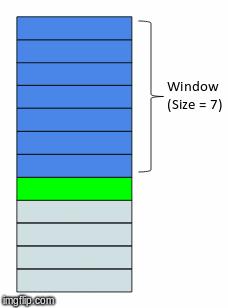



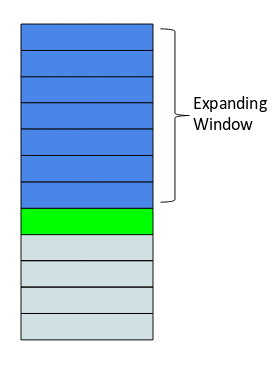


##### Exponential weighted functions:

Exponential weighted functions, such as Exponential Moving Average (EMA) or Weighted Moving Average (WMA), assign different weights to the data within a group. The weights are usually exponentially decreasing, meaning that more recent data points have higher weights compared to older data points. This allows for more emphasis on recent information in calculations.

EMA is commonly used in financial analysis and forecasting. It provides a smoothed average of a time series by assigning higher weights to more recent observations. The weights decay exponentially as the observations get older.

Gradient descent is an optimization algorithm that calculates the exponential weighted average of gradients. It uses this average to update the weights, making it faster than standard gradient descent. The exponential weighting of the gradients allows the algorithm to adapt and converge to the optimal solution more efficiently.

## `Rolling()`
The `.rolling()` function, also known as the rolling window function, is used to apply calculations to a series of data by specifying the parameter window=n. It creates a rolling window of size n and applies an appropriate statistical function to the window.

### Create Rolling Object

In [114]:
np.random.seed(1234)
s = pd.Series(np.random.randn(1000),
              index = pd.date_range('1/1/2023', periods=1000))

s = s.cumsum()
s

2023-01-01     0.471435
2023-01-02    -0.719541
2023-01-03     0.713166
2023-01-04     0.400515
2023-01-05    -0.320074
                ...    
2025-09-22    14.542595
2025-09-23    15.474141
2025-09-24    15.801673
2025-09-25    16.542487
2025-09-26    15.740582
Freq: D, Length: 1000, dtype: float64

In [115]:
rolling = s.rolling(window = 60)
rolling 

Rolling [window=60,center=False,axis=0,method=single]

### Parameters
When creating a rolling window object using `.rolling()`, it supports the following parameters:

* `window`: The size of the rolling window. This can be an integer representing the number of observations or a string representing a time-based offset.
* `min_periods`: The minimum number of non-null observations required to have a value. If the number of non-null observations within the window is below min_periods, the result will be `NaN`.
* `center`: A boolean value indicating whether the label of the window should be the center of the window. By default, it is set to False, meaning the label represents the right edge of the window.
* `win_type`: The type of window function to use. It can be a string representing a predefined window function, such as `boxcar`, `triang`, `hamming`, `bartlett`, etc., or it can be a callable function to define a custom window function.
* `on`: For DataFrame objects, the column name or index level name to apply the rolling operation on. If not specified, the operation will be applied to all columns or levels.
* `axis`: The axis along which the rolling operation is applied. By default, it is set to 0 (index-wise operation).

In [116]:
s.rolling(window = 5, win_type  = 'triang').mean() #triangular weighting function.

2023-01-01          NaN
2023-01-02          NaN
2023-01-03          NaN
2023-01-04          NaN
2023-01-05     0.183645
                ...    
2025-09-22    15.212086
2025-09-23    14.858105
2025-09-24    14.860591
2025-09-25    15.324875
2025-09-26    15.746828
Freq: D, Length: 1000, dtype: float64

In [117]:
s.rolling(window = 5, win_type = 'gaussian').mean(std = 0.1) # Gaussian window function,

2023-01-01          NaN
2023-01-02          NaN
2023-01-03          NaN
2023-01-04          NaN
2023-01-05     0.713166
                ...    
2025-09-22    14.826711
2025-09-23    14.270431
2025-09-24    14.542595
2025-09-25    15.474141
2025-09-26    15.801673
Freq: D, Length: 1000, dtype: float64

### Statistics


In [118]:
rolling.mean()

2023-01-01          NaN
2023-01-02          NaN
2023-01-03          NaN
2023-01-04          NaN
2023-01-05          NaN
                ...    
2025-09-22    14.842707
2025-09-23    14.910714
2025-09-24    14.989160
2025-09-25    15.057519
2025-09-26    15.102065
Freq: D, Length: 1000, dtype: float64

<AxesSubplot: >

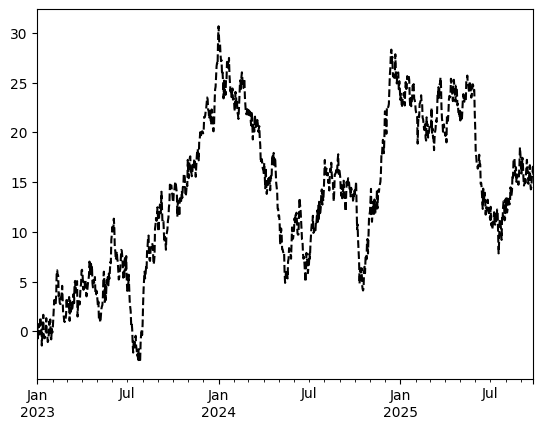

In [119]:
s.plot(style = 'k--')

<AxesSubplot: >

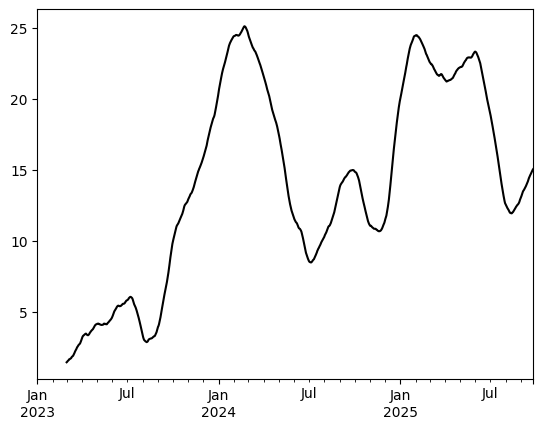

In [120]:
rolling.mean().plot(style = 'k')

### DataFrame Application

In [121]:
df = pd.DataFrame(np.random.randn(1000, 4),
                  index = pd.date_range('1/1/2023', periods = 1000),
                  columns = ['A', 'B', 'C', 'D'])

df = df.cumsum()

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
      dtype=object)

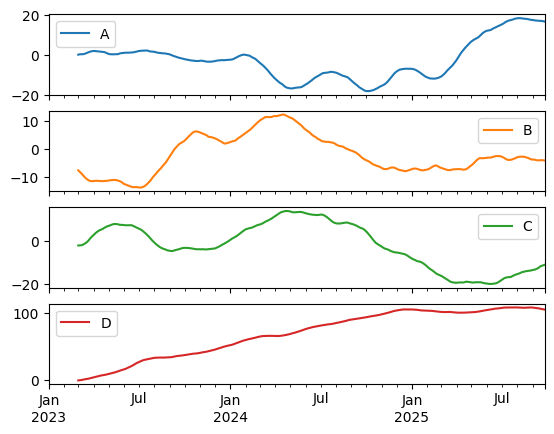

In [122]:
df.rolling(window = 60).mean().plot(subplots = True)

### Statistical method
| Method   | Description                                 |
|----------|---------------------------------------------|
| count()  | Number of non-null observations             |
| sum()    | Sum of values                               |
| mean()   | Mean of values                              |
| median() | Arithmetic median of values                 |
| min()    | Minimum                                     |
| max()    | Maximum                                     |
| std()    | Bessel-corrected sample standard deviation  |
| var()    | Unbiased variance                           |
| skew()   | Sample skewness (3rd moment)                |
| kurt()   | Sample kurtosis (4th moment)                |
| quantile()| Sample quantile (value at %)                |


### `apply()`

<AxesSubplot: >

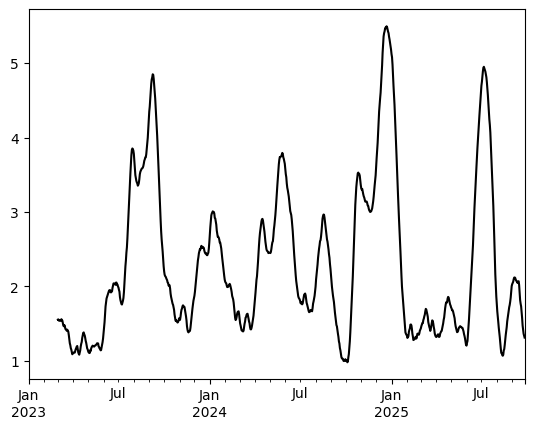

In [123]:
def mad(x):
    return np.fabs(x - x.mean()).mean()
s.rolling(window = 60).apply(mad, raw = True).plot(style = 'k')

### Time type moving windows
 To create a rolling window with a variable size based on a time window, we can pass an offset (or convertible) to the `.rolling()` method in pandas. This will generate windows of varying sizes based on the passed time window. It includes all the preceding values within the specified time increment for each time point.

In [124]:
dft = pd.DataFrame({'A': [0, 1, 2, np.nan, 4]},
                   index = pd.date_range('20130101 09:00:00',
                                       periods = 5,
                                       freq ='s'))

dft

,A
2013-01-01 09:00:00,0.0
2013-01-01 09:00:01,1.0
2013-01-01 09:00:02,2.0
2013-01-01 09:00:03,NaN
2013-01-01 09:00:04,4.0


In [125]:
dft.rolling(2).sum()

,A
2013-01-01 09:00:00,NaN
2013-01-01 09:00:01,1.0
2013-01-01 09:00:02,3.0
2013-01-01 09:00:03,NaN
2013-01-01 09:00:04,NaN


`min_periods=1`: Specifies the minimum number of non-null values required for a valid calculation. In this case, since min_periods is set to 1, the rolling sum will be calculated even if only one non-null value is available in the window.

In [126]:
dft.rolling(2, min_periods = 1).sum()

,A
2013-01-01 09:00:00,0.0
2013-01-01 09:00:01,1.0
2013-01-01 09:00:02,3.0
2013-01-01 09:00:03,2.0
2013-01-01 09:00:04,4.0


In [127]:
# Specify the frequency to 2s
dft.rolling('2s').sum()

,A
2013-01-01 09:00:00,0.0
2013-01-01 09:00:01,1.0
2013-01-01 09:00:02,3.0
2013-01-01 09:00:03,2.0
2013-01-01 09:00:04,4.0


### `Rolling()` and `resample()`
When using `.rolling()` with an offset, it functions similar to `resampling`. They both operate on Pandas objects with time-based indexing and perform aggregation operations.

With `.rolling()` and an offset, you take a look-back window and summarize all the values within that window, including the endpoint but excluding the starting point. This becomes the new value at that time. These are time-aware variable-sized windows for each point in the input, resulting in an output of the same size as the input.

With `.resample()` and an offset, we construct a new index that is offset by the frequency. For each frequency bin, we summarize the points within the window that rolls back in time from the resampling point. The aggregated result is the output at that frequency point. The window is fixed-sized in the frequency space. Your result will have a regular frequency shape between the minimum and maximum values of the original input object.

In summary, `.rolling()` performs time-based window operations, while `.resample()` performs frequency-based window operations. They have slightly different behavior in terms of how the windows are defined and how the aggregation is performed. Both can be useful for analyzing time series data depending on your specific requirements.

## Expanding
An alternative to rolling statistics is using expanding windows. Expanding windows provide the value of the statistic at each time point along with all the available data up to that point.

In contrast to rolling windows that have a fixed size, expanding windows start from the beginning of the data and gradually increase in size, incorporating all the available data. This allows you to calculate statistics that consider the entire history of the data up to each time point.

Expanding windows are useful when you want to track the cumulative effect of a statistic over time or when you want to compare the current value with the historical values. They provide a broader perspective on the overall trend and behavior of the data.

### Expanding object
The `.expanding()` method follows a similar interface to the `.rolling()` method and returns an expanding object.

Since these calculations are a special case of rolling statistics, they are implemented in Pandas. Therefore, the following two calls are equivalent:

In [128]:
df

,A,B,C,D
2023-01-01,-1.582208,-1.620190,0.046562,-1.679829
2023-01-02,-0.186316,-2.465162,0.860569,-1.729571
2023-01-03,0.347931,-3.272171,1.702210,-2.287744
2023-01-04,-0.281226,-2.094504,0.857129,-2.569183
2023-01-05,1.438731,-3.172003,-0.521153,-2.864327
...,...,...,...,...
2025-09-22,18.609221,-3.545389,-9.438823,100.147704
2025-09-23,16.967721,-3.270230,-9.363745,101.509326
2025-09-24,15.871460,-4.371879,-9.805958,100.158863
2025-09-25,16.056352,-3.529039,-10.793556,99.565986


In [129]:
#  specify the minimum number of non-null observations by min_periods
df.rolling(window = len(df), min_periods = 1).mean()[:5]

,A,B,C,D
2023-01-01,-1.582208,-1.620190,0.046562,-1.679829
2023-01-02,-0.884262,-2.042676,0.453565,-1.704700
2023-01-03,-0.473531,-2.452508,0.869780,-1.899048
2023-01-04,-0.425455,-2.363007,0.866617,-2.066582
2023-01-05,-0.052618,-2.524806,0.589063,-2.226131


In [130]:
df.expanding(min_periods = 1).mean()[:5]

,A,B,C,D
2023-01-01,-1.582208,-1.620190,0.046562,-1.679829
2023-01-02,-0.884262,-2.042676,0.453565,-1.704700
2023-01-03,-0.473531,-2.452508,0.869780,-1.899048
2023-01-04,-0.425455,-2.363007,0.866617,-2.066582
2023-01-05,-0.052618,-2.524806,0.589063,-2.226131


### Statistical method
| Method     | Description                                      |
|------------|--------------------------------------------------|
| count()    | Number of non-null observations                  |
| sum()      | Sum of values                                    |
| mean()     | Mean of values                                   |
| median()   | Arithmetic median of values                       |
| min()      | Minimum                                          |
| max()      | Maximum                                          |
| std()      | Bessel-corrected sample standard deviation       |
| var()      | Unbiased variance                                |
| skew()     | Sample skewness (3rd moment)                      |
| kurt()     | Sample kurtosis (4th moment)                      |
| quantile() | Sample quantile (value at %)                      |
| apply()    | Generic apply                                    |
| cov()      | Unbiased covariance (binary)                      |
| corr()     | Correlation (binary)                              |


### Special methods of expanding
* `cumsum()` computes the cumulative sum of values.
* `cumprod()` computes the cumulative product of values.
* `cummax()` computes the cumulative maximum of values.
* `cummin()` computes the cumulative minimum of values.

In [131]:
s.cumsum().head()

2023-01-01    0.471435
2023-01-02   -0.248105
2023-01-03    0.465061
2023-01-04    0.865576
2023-01-05    0.545501
Freq: D, dtype: float64

In [132]:
s.cummax().head()

2023-01-01    0.471435
2023-01-02    0.471435
2023-01-03    0.713166
2023-01-04    0.713166
2023-01-05    0.713166
Freq: D, dtype: float64

* `shift()` shifts the values of a series or dataframe along the index without changing the index itself. It can be used to create lags or leads in the data.

* `diff()` calculates the difference between consecutive elements in a series or dataframe. The periods parameter specifies the number of periods to shift by, and it can be negative to indicate shifts in the opposite direction.

* `pct_change()` calculates the percentage change between consecutive elements in a series or dataframe. Similar to `diff()`, it also accepts the periods parameter to specify the number of periods to shift by.

In [133]:
s.shift(2).head()

2023-01-01         NaN
2023-01-02         NaN
2023-01-03    0.471435
2023-01-04   -0.719541
2023-01-05    0.713166
Freq: D, dtype: float64

In [134]:
s.diff(3).head()

2023-01-01         NaN
2023-01-02         NaN
2023-01-03         NaN
2023-01-04   -0.070921
2023-01-05    0.399466
Freq: D, dtype: float64

In [135]:
s.pct_change(3).head()

2023-01-01         NaN
2023-01-02         NaN
2023-01-03         NaN
2023-01-04   -0.150436
2023-01-05   -0.555169
Freq: D, dtype: float64